<a href="https://colab.research.google.com/github/madhulraokadam/ml-projects-green-scale-datasets/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appliance Energy Prediction Using Linear Regression**





## **Definition**

Linear regression is a supervised machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables.

It predicts continuous numerical values.

## **Purpose**

To understand how input variables affect an output variable.

To make predictions based on historical data.

## **Types**

Simple Linear Regression: Uses one independent variable.

Multiple Linear Regression: Uses two or more independent variables.

## **Basic Concept**

It fits a straight line (best fit line) through the data points.

The line is chosen to minimize the difference between actual and predicted values using the least squares method.

## **Equation :**

y = b0 + b1x1 + b2x2 + … + bn xn

y is the predicted value, b0 is the intercept, and b1, b2 are coefficients.

Key Assumptions

Linear relationship between variables.

Independence of errors.

Constant variance of errors (homoscedasticity).

Normally distributed residuals.

# **Advantages :**

Simple and easy to understand.

Computationally efficient.

Highly interpretable.

Works well with linearly related data.

## **Disadvantages :**

Cannot model complex non-linear relationships.

Sensitive to outliers.

Performance decreases with multicollinearity.

Evaluation Metrics

R squared

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

# **Applications :**


Sales forecasting

Price prediction

Risk assessment

Environmental and climate analysis

Trend analysis

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#load the dataset
df = pd.read_csv('/content/appliance_energy.csv')
#display
df.head()


,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [ ]:
df.shape
print(f'No. of rows: {df.shape[0]} and columns: {df.shape[1]}')

No. of rows: 100 and columns: 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
# stat of the data
df.describe()



,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
df.columns

Index(['Temperature (°C)', 'Energy Consumption (kWh)'], dtype='object')

In [ ]:
#feature and target / label selection
# x= feature
# y = target

x=df[['Temperature (°C)']]
y=df[['Energy Consumption (kWh)']]



In [ ]:
#dataset 100% - train(70) test (30)
#               train(80) test (20)

#random state = 49 or any value but trainer and client  random state value should be same


In [ ]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split( # cant change order

    x,y,train_size=0.8, random_state=49)

In [ ]:
x_train

,Temperature (°C)
51,30.502656
56,16.769850
13,19.246782
99,17.157829
50,34.391693
...,...
12,31.648853
54,26.958000
40,17.440765
45,28.250446


In [ ]:
#instanstiate the model
model = LinearRegression()

In [ ]:
#train the model
model.fit(x_train, y_train)   #x/ytrain: we take training data only


LinearRegression()

In [ ]:
#prediction
y_pred = model.predict(x_test)
y_pred

array([[2.95296145],
       [2.97702663],
       [2.64343201],
       [2.87982041],
       [2.69687938],
       [2.51822842],
       [2.47515164],
       [2.12378216],
       [1.69858149],
       [3.26350879],
       [1.86207873],
       [3.00648336],
       [1.85960332],
       [2.26637651],
       [1.72818864],
       [2.157644  ],
       [2.85254189],
       [2.25222311],
       [1.74633633],
       [2.55738875]])

In [ ]:
#evaluate the model
#mse
mse = mean_squared_error(y_test, y_pred)
mse

0.19326792820375965

In [ ]:
#r2score
r2 = r2_score(y_test, y_pred)
r2
print(f'The R Squared Score:{r2*100:.2f}%')

The R Squared Score:59.46%


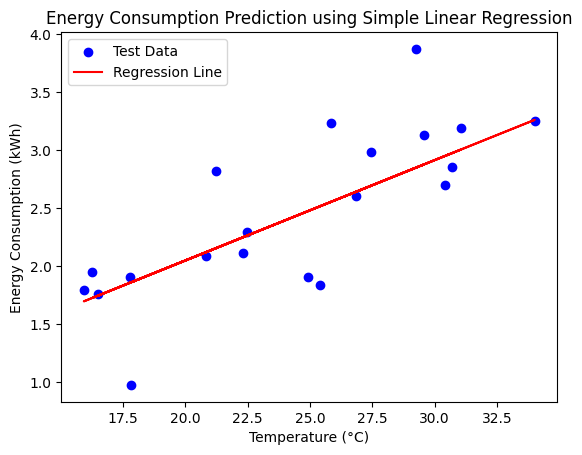

In [ ]:
plt.scatter(x_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(x_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [ ]:
#save the model

import joblib
joblib.dump(model, 'energy_consumption_model.pkl')

['energy_consumption_model.pkl']